Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_Skin_Cancer/Train/")
# data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_Skin_Cancer/Test/')
data_dir_train = pathlib.Path("/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
seed = 123

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size,
    seed=seed,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset='training'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size,
    seed=seed,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset='validation'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

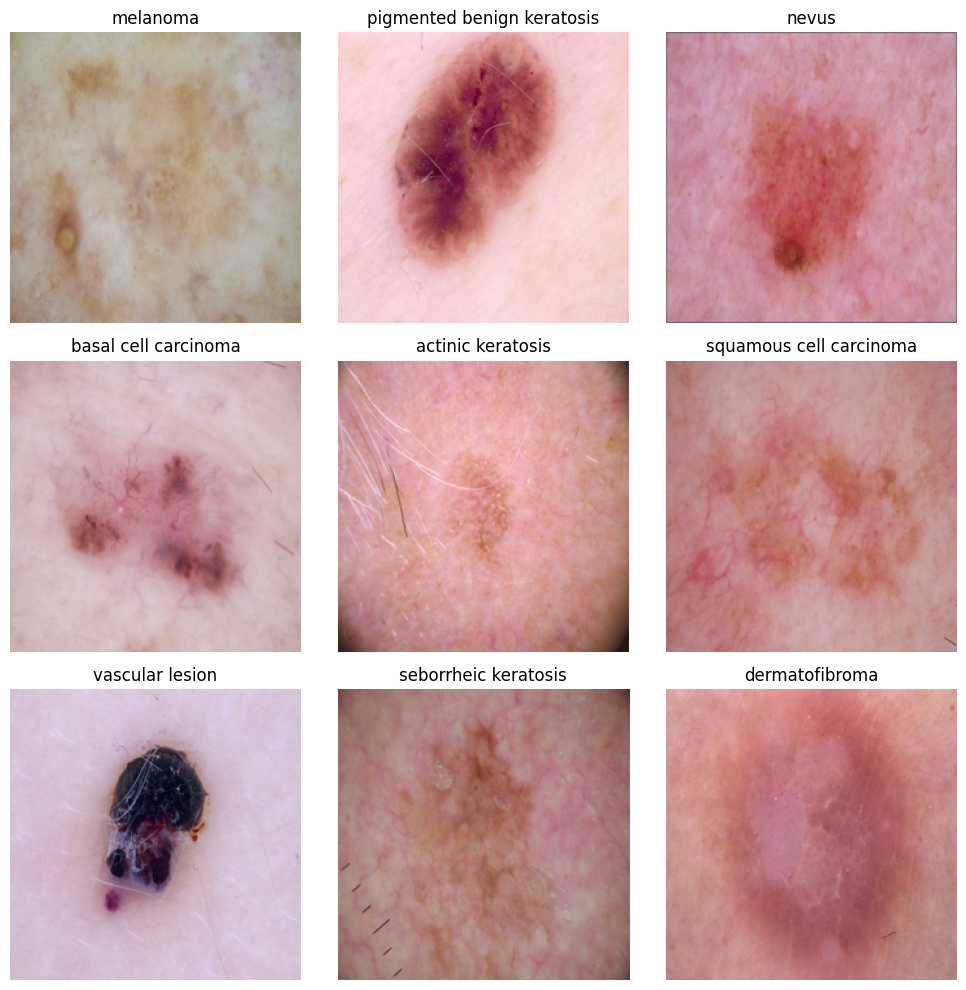

In [ ]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

# Specify the directory where your images are stored
image_directory = '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

# Set the desired image size and create a dictionary to store one image from each class
image_size = (224, 224)  # Adjust the size as per your requirements
class_images = {}

# Iterate over each class directory
for class_dir in glob.glob(image_directory + '/*'):
    class_name = class_dir.split('/')[-1]  # Extract the class name from the directory path

    # Load the first image from the current class directory
    image_path = glob.glob(class_dir + '/*.jpg')[0]  # Assuming images are in JPEG format
    image = Image.open(image_path).resize(image_size)

    class_images[class_name] = image  # Store the image in the dictionary

# Visualize one instance of each class
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i, class_name in enumerate(class_images):
    axes[i].imshow(class_images[class_name])
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),  # Normalize pixel values between 0 and 1
    # Add more layers to your model
    layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(9, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 59168)             0

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 10s 117ms/step - loss: 2.0575 - accuracy: 0.2785 - val_loss: 1.8044 - val_accuracy: 0.3937
Epoch 2/20
56/56 [==============================] - 6s 105ms/step - loss: 1.7619 - accuracy: 0.3934 - val_loss: 1.7381 - val_accuracy: 0.4251
Epoch 3/20
56/56 [==============================] - 6s 106ms/step - loss: 1.6074 - accuracy: 0.4554 - val_loss: 1.5672 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 6s 100ms/step - loss: 1.5393 - accuracy: 0.4688 - val_loss: 1.4985 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 6s 101ms/step - loss: 1.4703 - accuracy: 0.4950 - val_loss: 1.4543 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 6s 100ms/step - loss: 1.3816 - accuracy: 0.5246 - val_loss: 1.5105 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 6s 100ms/step - loss: 1.3243 - accuracy: 0.5335 - val_loss: 1.4539 - val_accuracy: 0.5347
Epoch

### Visualizing training results

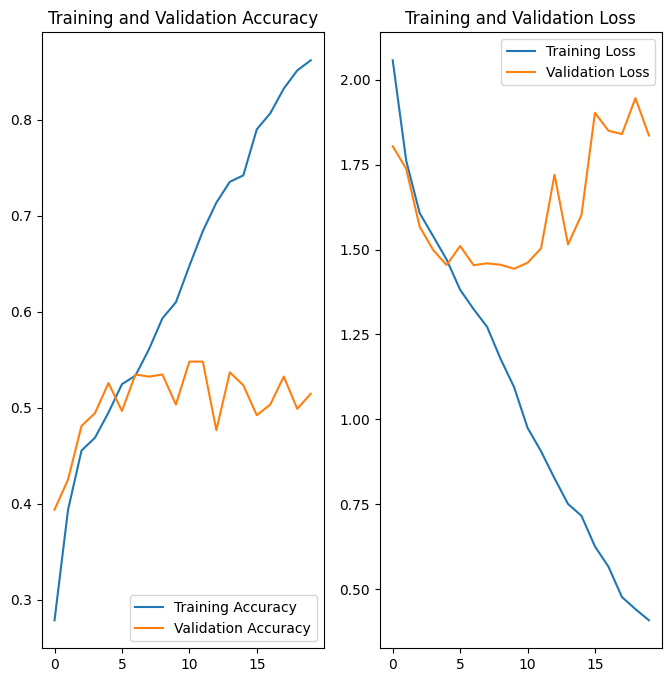

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

From the above graph, we see the model is **overfitting**.

**Accuracy**


> As we can see that there is a large gap between training accuracy and validation accutacy.


> We can see that high training accuracy but low validation accuracy

**Loss**



> Training loss is decreasing, but validation loss is increasing



### Write your findings here

In [ ]:
train_images = []
train_labels = []

for images, labels in train_ds:
    train_images.append(images)
    train_labels.append(labels)

# Concatenate the image and label arrays
train_images = np.concatenate(train_images, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Generate augmented data from the original training images
train_augmented_generator = datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=32,
    shuffle=True
)

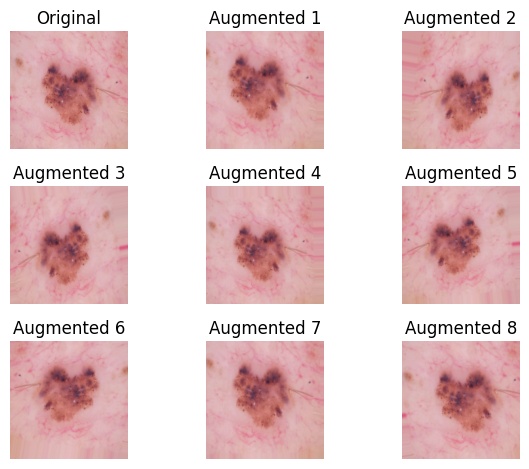

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
image_index = 0  # Index of the training image you want to visualize

# Get the original image and its corresponding label
original_image = train_images[image_index]
label = train_labels[image_index]

# Reshape the image to (1, height, width, channels) to match the expected input shape
original_image = np.expand_dims(original_image, axis=0)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Generate augmented images from the original image
augmented_images = datagen.flow(original_image, batch_size=1, shuffle=False)

# Visualize the original image
plt.subplot(3, 3, 1)
plt.title('Original')
plt.imshow(original_image[0].astype(int))
plt.axis('off')

# Visualize the augmented images
for i in range(2, 10):
    augmented_image = augmented_images.next()
    plt.subplot(3, 3, i)
    plt.title(f'Augmented {i-1}')
    plt.imshow(augmented_image[0].astype(int))
    plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()

# Add the convolutional layers
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout layer
model.add(Dropout(0.25))

# Flatten the feature maps
model.add(Flatten())

# Add the dense layers
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

### Compiling the model

In [ ]:
## Your code goes here
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history =model.fit(train_augmented_generator, epochs=20, validation_data=val_ds)

Epoch 1/20
56/56 [==============================] - 8s 133ms/step - loss: 84.3389 - accuracy: 0.2221 - val_loss: 2.1284 - val_accuracy: 0.2617
Epoch 2/20
56/56 [==============================] - 7s 117ms/step - loss: 1.9282 - accuracy: 0.3181 - val_loss: 1.9531 - val_accuracy: 0.3154
Epoch 3/20
56/56 [==============================] - 6s 113ms/step - loss: 1.8730 - accuracy: 0.3343 - val_loss: 1.8601 - val_accuracy: 0.3647
Epoch 4/20
56/56 [==============================] - 6s 112ms/step - loss: 1.8374 - accuracy: 0.3516 - val_loss: 1.8532 - val_accuracy: 0.3468
Epoch 5/20
56/56 [==============================] - 6s 114ms/step - loss: 1.7624 - accuracy: 0.3823 - val_loss: 1.7214 - val_accuracy: 0.4161
Epoch 6/20
56/56 [==============================] - 6s 111ms/step - loss: 1.7869 - accuracy: 0.3583 - val_loss: 1.8041 - val_accuracy: 0.3826
Epoch 7/20
56/56 [==============================] - 6s 112ms/step - loss: 1.6959 - accuracy: 0.4185 - val_loss: 1.7027 - val_accuracy: 0.4049
Epoch

### Visualizing the results

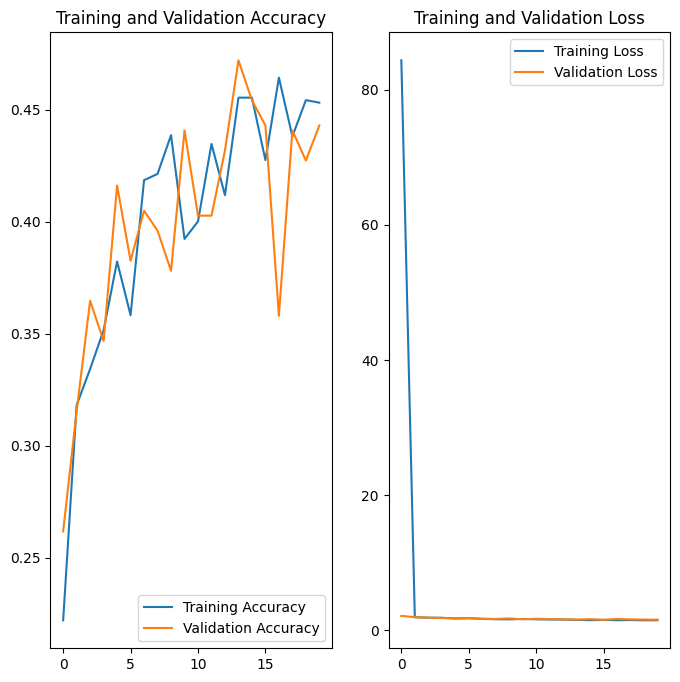

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Yes, Augmentation did help with getting rid of overfitting.

**Loss**



> As we can see Training loss started somewhere around 84.339 and validation loss started at 2.1284.





> After 2nd epoch, training loss dropped to 1.9 and it ranged between 1.48 to 1.928 till 20th epoch




> Validation loss ranges between 2.17 to 1.576.





> In conclusion training loss and validation loss ranges between 2.17 to 1.48 itself



**Accuracy**



> With respect to training accuracy and validation accuracy we can see minor differences.





> Training accuracy ranges between 0.22 to 0.46. Validation accuracy ranges between 0.26 to 0.44



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
class_counts = {class_name: 0 for class_name in class_names}

# Iterate over the dataset
for images, labels in train_ds:
    # Get the class labels as numpy arrays
    labels = np.argmax(labels, axis=1)

    # Count the occurrences of each class
    unique_classes, counts = np.unique(labels, return_counts=True)

    # Update the class counts dictionary
    for class_label, count in zip(unique_classes, counts):
        class_name = class_names[class_label]
        class_counts[class_name] += count

# Print the class counts
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} instances")

actinic keratosis: 92 instances
basal cell carcinoma: 309 instances
dermatofibroma: 77 instances
melanoma: 352 instances
nevus: 277 instances
pigmented benign keratosis: 370 instances
seborrheic keratosis: 58 instances
squamous cell carcinoma: 142 instances
vascular lesion: 115 instances


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?




1.   Seborrheic Keratosis has least number of samples
2.   Pigmented Benign Keratosis dominate the data in terms proportionate number of samples




#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B5E05160>: 100%|██████████| 500/500 [00:01<00:00, 285.06 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to /Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B5E42A30>: 100%|██████████| 500/500 [00:01<00:00, 304.94 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to /Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B5C4A5E0>: 100%|██████████| 500/500 [00:01<00:00, 303.41 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2B5E60E20>: 100%|██████████| 500/500 [00:07<00:00, 71.16 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to /Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2B5E6CE50>: 100%|██████████| 500/500 [00:06<00:00, 72.73 Samples/s]  


Initialised with 462 image(s) found.
Output directory set to /Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B5E839D0>: 100%|██████████| 500/500 [00:01<00:00, 274.85 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to /Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2B5E47310>: 100%|██████████| 500/500 [00:03<00:00, 137.88 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B5E5A190>: 100%|██████████| 500/500 [00:01<00:00, 296.01 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B232EE20>: 100%|██████████| 500/500 [00:01<00:00, 289.12 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:

path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010799.jpg_c6309d11-a9bb-47d5-a392-ace6936131a2.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010241.jpg_a9c7da27-98a5-4ed8-84f9-ace24ce3c6f1.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000171.jpg_3c4ba43a-a550-4327-89ed-02f14b36920f.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010789.jpg_510cef27-4711-4538-8f46-d0d337b19aaa.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011121.jpg_bf3daa5e-2427-42ea-9073-0bcc55720be0.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010610.jpg_64405d9a-d2b2-432

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
file_paths = []
for root, dirs, files in os.walk(path_to_training_dataset):
    for file in files:
        file_path = os.path.join(root, file)
        file_paths.append(file_path)

In [ ]:
file_paths

['/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/.DS_Store',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010550.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0011128.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010587.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010034.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000555.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010746.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0001105.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010791.jpg',
 '/Users/Skin cancer ISIC The International Skin Imaging Collaboration/

In [ ]:
parent_dirs = []
for root, dirs, files in os.walk(path_to_training_dataset):
    for file in files:
        file_path = os.path.join(root, file)
        parent_dir = os.path.basename(os.path.dirname(file_path))
        parent_dirs.append(parent_dir)

In [ ]:
dataframe_dict = dict(zip(file_paths, parent_dirs))

In [ ]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [ ]:
original_df

,Path,Label
0,/Users/Skin cancer ISIC The International Skin...,Train
1,/Users/Skin cancer ISIC The International Skin...,melanoma
2,/Users/Skin cancer ISIC The International Skin...,melanoma
3,/Users/Skin cancer ISIC The International Skin...,melanoma
4,/Users/Skin cancer ISIC The International Skin...,melanoma
...,...,...
6735,/Users/Skin cancer ISIC The International Skin...,output
6736,/Users/Skin cancer ISIC The International Skin...,output
6737,/Users/Skin cancer ISIC The International Skin...,output
6738,/Users/Skin cancer ISIC The International Skin...,output


In [ ]:
original_df = original_df[original_df['Label'] != 'output']

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df,df2])

In [ ]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Train                           1
Name: count, dtype: int64

In [ ]:
new_df['Label'].value_counts().sum()

6740

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train = pathlib.Path("/Users/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  labels='inferred',
  label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,labels='inferred',
  label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)),
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(9, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
 # your model fit code

Epoch 1/50
169/169 [==============================] - 23s 131ms/step - loss: 2.0707 - accuracy: 0.2415 - val_loss: 1.6616 - val_accuracy: 0.3719
Epoch 2/50
169/169 [==============================] - 22s 128ms/step - loss: 1.5944 - accuracy: 0.3913 - val_loss: 1.4861 - val_accuracy: 0.4410
Epoch 3/50
169/169 [==============================] - 22s 127ms/step - loss: 1.3755 - accuracy: 0.4757 - val_loss: 1.3627 - val_accuracy: 0.4959
Epoch 4/50
169/169 [==============================] - 22s 129ms/step - loss: 1.2333 - accuracy: 0.5427 - val_loss: 1.2029 - val_accuracy: 0.5523
Epoch 5/50
169/169 [==============================] - 23s 131ms/step - loss: 1.0787 - accuracy: 0.5948 - val_loss: 1.1927 - val_accuracy: 0.5620
Epoch 6/50
169/169 [==============================] - 22s 128ms/step - loss: 0.9721 - accuracy: 0.6393 - val_loss: 1.0416 - val_accuracy: 0.6028
Epoch 7/50
169/169 [==============================] - 22s 127ms/step - loss: 0.8770 - accuracy: 0.6786 - val_loss: 1.0541 - val_ac

#### **Todo:**  Visualize the model results

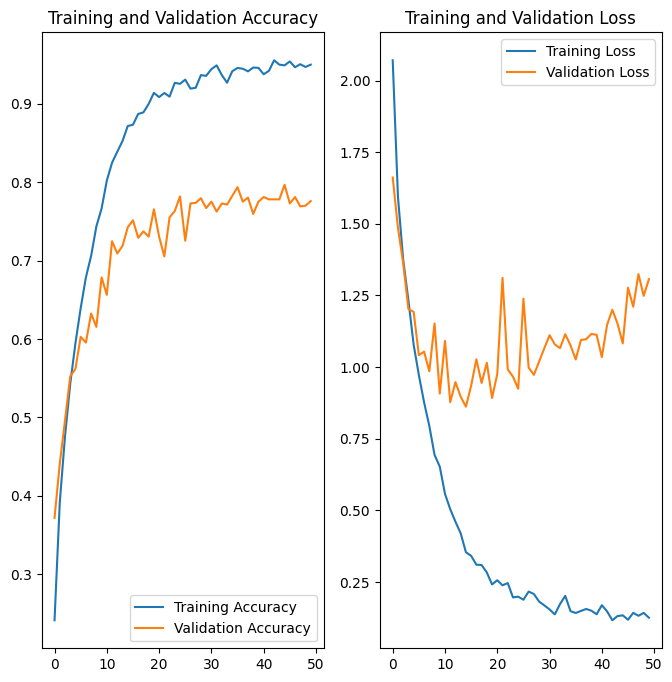

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Yes, class rebalance did help with** **getting rid of overfitting to some extent**.

**Loss**


> As we can see Training loss started somewhere around 2.07 and validation loss started at 1.6.



> Training loss ranged between 2.07 and 0.13 and validation loss 1.676 to 0.899

**Accuracy**


> With respect to training accuracy and validation accuracy we can see minor differences.


> Training accuracy ranges between 0.24 to 0.95.
Validation accuracy ranges between 0.37 to 0.79.

Overall, the model showed significant improvement in both accuracy and loss values as the training progressed, indicating that it effectively learned from the data and became highly proficient at making predictions.

Yes there was a significant effect of class rebalance, accuracy for training and validation dataset became constant after almost 25 epochs